This is just a simplified notebook for the original Linear regression tutorial

Source : https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

# 1.One-variable Linear Regression

## 1.1 Load the data

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#df = pd.read_csv('insurance.csv') #load the csv dataset into a 'dataframe' df

#You can mount the file on your google drive and load it. To make life easier, just make sure your directory doesn't have spaces
#Example    /Dataset/machine learning <<<This directory has spaces
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset/insurance.csv') #load the csv dataset into a 'dataframe' df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Explore the data

In [154]:
df.sample(5)
#df.head(5) #this shows the TOP 5 rows/records/samples/observations of the dataset
#df.tail(5) #this shows the BOTTOM 5 rows/records/samples/observations of the dataset
#df.sample(3) #df.sample sample randomly from the dataset

,age,sex,bmi,children,smoker,region,charges
331,52,male,27.36,0,yes,northwest,24393.6224
66,61,female,39.10,2,no,southwest,14235.0720
196,39,female,32.80,0,no,southwest,5649.7150
824,60,male,24.32,0,no,northwest,12523.6048
98,56,male,19.95,0,yes,northeast,22412.6485


In [138]:
df.info()
# --Checklist--
#Q1 How many rows and columns does the dataset have?
#Q2 Which are the feature(independant variable(s)) columns, and which is/are the target output (dependant variable(s))?
#Q3 Is the target output suitable for a regression or a classification problem?
#Q4 For each of the variables, what is the datatypes?
#Q5 Which variable is non-informative  or "useless"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1.3 Select one variable data

BMI vs insurance charges among those who smoke.

* Let's take a look at just one variable. We select people who smoke, their BMI and the amount of insurance charges that they have to pay. And then we visualize it.

* As we can see below, the higher the BMI (the more obese a smoker person is), the more expensive the amount of insurance charges. This is logical and fits our intuition/hypothesis.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


<Axes: xlabel='bmi', ylabel='charges'>

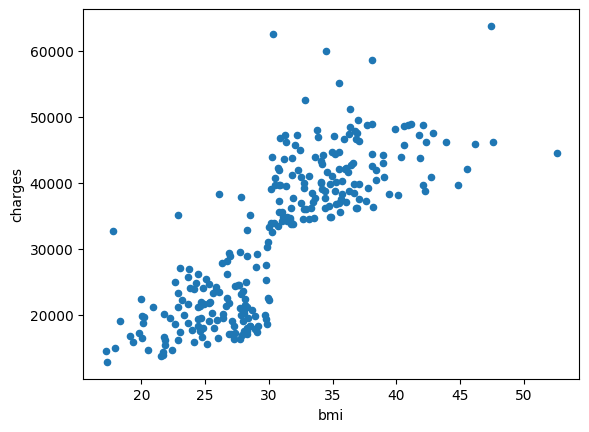

In [139]:
df = df[df['smoker']=='yes'] #this selects the rows of data of people who smokes
df.info()
df.plot.scatter(x='bmi',y='charges')

# 1.3 Prepare the training and test dataset

In [140]:
from sklearn.model_selection import train_test_split


X = df[['bmi']] # Select your feature of choices here. Replace 'bmi' with the name of columns in the dataset of your choice
y = df[['charges']] # Target output/dependent variable

#plt.scatter(X,y)

# Split the dataset into training and testing.
# This function randonly samples the data and split into training and testing data
# test_size =0.3 means that the ratio of train vs training is 70:30
# Normally, the ratio is set as 80:20, 70:30,
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)


print(X_train.shape)
print(f' The length of the training dataset is : {len(X_train)}')
print(f' The length of the test dataset is : {len(X_test)}')



(191, 1)
 The length of the training dataset is : 191
 The length of the test dataset is : 83


## 1.4 Train the model on train data
 * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [141]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression

#As you can see, there is not much of hyper parameters of the algorithm that you can optimize here

lin_reg = LinearRegression() #applies all the cost function J, gradient descent implicitly. we dont need to think about it.
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.


#print(f'Parameters m: {lin_reg.coef_}')
#print(f'Intercept c: {lin_reg.intercept_}')

print(f'Parameters m/theta_1: {lin_reg.coef_}')
print(f'Intercept c/theta_0: {lin_reg.intercept_}')


Parameters m/theta_1: [[1423.46160086]]
Intercept c/theta_0: [-11592.27433655]


## 1.5 Evaluate the model on test data

### R2 Score

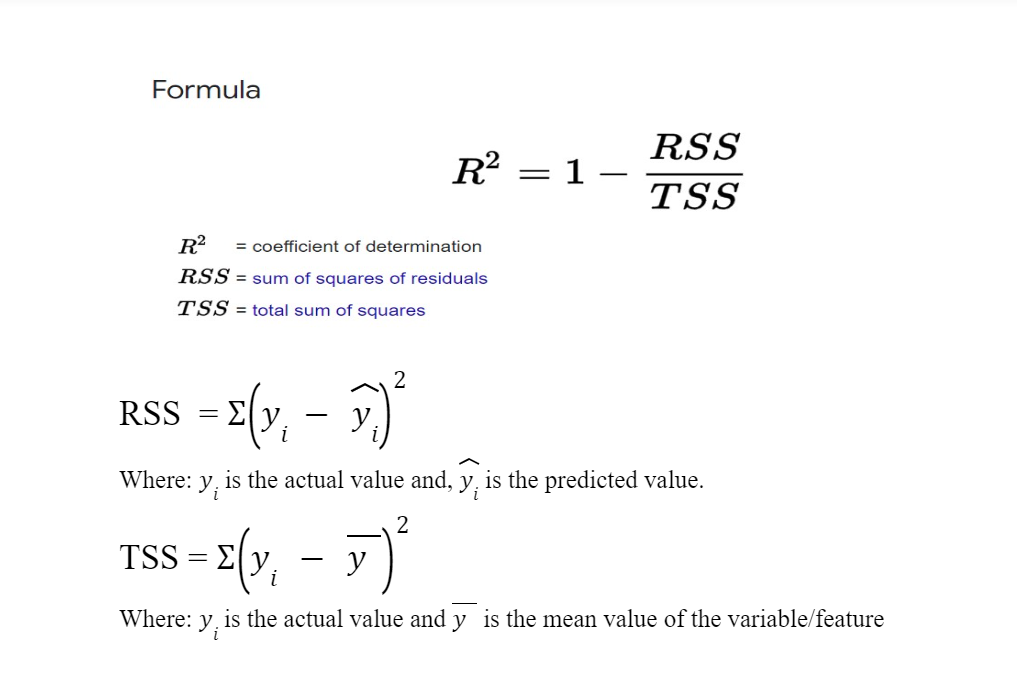

In [142]:
print(f'R2 score {lin_reg.score(X_test,y_test)}') # we want R2 score to be close to 1 (Better accuracy)

R2 score 0.7071273310571426


### Visualize the Regression line

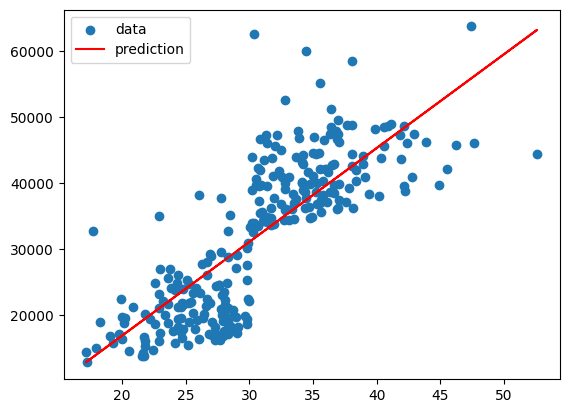

In [143]:
y_pred = lin_reg.predict(X)


plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.legend(['data','prediction'])
plt.show()


### Visualize the Regression line on the train and test data

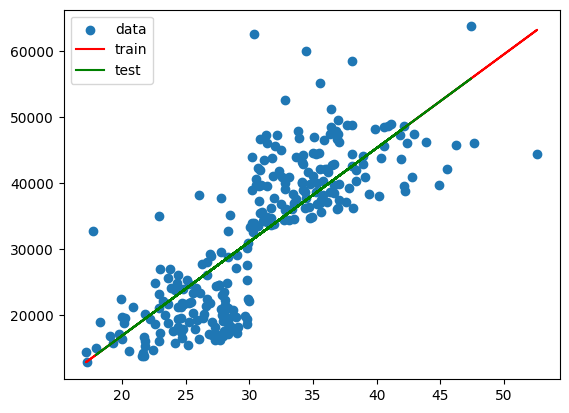

In [144]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)


plt.scatter(X,y)
plt.plot(X_train,y_pred_train,color='red')
plt.plot(X_test,y_pred_test,color='green')
plt.legend(['data','train','test'])
plt.show()


# 2.Multivariable Linear Regression

## 2.1 Encode categorical(non continuous) variable

In [145]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


 ### One Hot Encoding (OHE)

 * There are other encoding methods as well...

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

df_encode.head()



,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.90,16884.9240,0,0,0,0,0,0,0,0,1
11,62,26.29,27808.7251,0,0,0,0,0,0,0,1,0
14,27,42.13,39611.7577,1,0,0,0,0,0,0,1,0
19,30,35.30,36837.4670,1,0,0,0,0,0,0,0,1
23,34,31.92,37701.8768,0,1,0,0,0,0,0,0,0


# 2.2 Prepare train and test dataset

In [147]:
# Prepare the training and testing dataset
X = df_encode.drop('charges',axis=1) # Independant variable
y = df_encode['charges'] # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

## 2.3 Train the model on train data

In [152]:
# Train the model on train data
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

print(f'--Parameters---')
for i, parameter in enumerate(lin_reg.coef_):
  print(f'theta_{i+1}: {parameter}')

print(f'Intercept theta_0: {lin_reg.intercept_}')

--Parameters---
theta_1: 268.390754726272
theta_2: 1445.3739065217167
theta_3: 435.7438086705513
theta_4: -1548.098711118638
theta_5: -270.59680734402986
theta_6: -289.15648293636895
theta_7: -4511.85907514598
theta_8: 4639.2397254421385
theta_9: -1275.0788367595896
theta_10: -3019.42591999898
theta_11: -1894.2838184477027
Intercept theta_0: -20639.27783066655


## 2.3 Evaluate the model on test data

In [149]:
print(f'R2 score {lin_reg.score(X_test,y_test)}') # we want R2 score to be close to 1 (Better accuracy)

R2 score 0.7872912334174366
